In [40]:
import pymysql
from sqlalchemy import create_engine

import getpass
password = getpass.getpass()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

raw_data = pd.read_sql_query('SELECT * FROM relevant_info', engine)
raw_data.head()

,film_id,title,month,n_rentals,last_month
0,1,ACADEMY DINOSAUR,8,9,0
1,2,ACE GOLDFINGER,2,1,4
2,2,ACE GOLDFINGER,8,4,0
3,3,ADAPTATION HOLES,8,6,0
4,4,AFFAIR PREJUDICE,2,1,6


In [3]:
query = '''
        SELECT * FROM relevant_info;
        '''

raw_data = pd.read_sql_query(query, engine)
raw_data

,film_id,title,month,n_rentals,last_month
0,1,ACADEMY DINOSAUR,8,9,0
1,2,ACE GOLDFINGER,2,1,4
2,2,ACE GOLDFINGER,8,4,0
3,3,ADAPTATION HOLES,8,6,0
4,4,AFFAIR PREJUDICE,2,1,6
...,...,...,...,...,...
1121,997,YOUTH KICK,8,3,0
1122,998,ZHIVAGO CORE,2,1,2
1123,998,ZHIVAGO CORE,8,2,0
1124,999,ZOOLANDER FICTION,8,7,0


In [4]:
raw_data.isna().sum()

film_id       0
title         0
month         0
n_rentals     0
last_month    0
dtype: int64

In [5]:
data=raw_data.fillna(0)
data

,film_id,title,month,n_rentals,last_month
0,1,ACADEMY DINOSAUR,8,9,0
1,2,ACE GOLDFINGER,2,1,4
2,2,ACE GOLDFINGER,8,4,0
3,3,ADAPTATION HOLES,8,6,0
4,4,AFFAIR PREJUDICE,2,1,6
...,...,...,...,...,...
1121,997,YOUTH KICK,8,3,0
1122,998,ZHIVAGO CORE,2,1,2
1123,998,ZHIVAGO CORE,8,2,0
1124,999,ZOOLANDER FICTION,8,7,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   film_id     1126 non-null   int64 
 1   title       1126 non-null   object
 2   month       1126 non-null   int64 
 3   n_rentals   1126 non-null   int64 
 4   last_month  1126 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 44.1+ KB


In [7]:
data

,film_id,title,month,n_rentals,last_month
0,1,ACADEMY DINOSAUR,8,9,0
1,2,ACE GOLDFINGER,2,1,4
2,2,ACE GOLDFINGER,8,4,0
3,3,ADAPTATION HOLES,8,6,0
4,4,AFFAIR PREJUDICE,2,1,6
...,...,...,...,...,...
1121,997,YOUTH KICK,8,3,0
1122,998,ZHIVAGO CORE,2,1,2
1123,998,ZHIVAGO CORE,8,2,0
1124,999,ZOOLANDER FICTION,8,7,0


In [8]:
data['delta_rented_last_month_%']=round((((data['n_rentals']-data['last_month'])/data['n_rentals'])*100),2)
data

,film_id,title,month,n_rentals,last_month,delta_rented_last_month_%
0,1,ACADEMY DINOSAUR,8,9,0,100.0
1,2,ACE GOLDFINGER,2,1,4,-300.0
2,2,ACE GOLDFINGER,8,4,0,100.0
3,3,ADAPTATION HOLES,8,6,0,100.0
4,4,AFFAIR PREJUDICE,2,1,6,-500.0
...,...,...,...,...,...,...
1121,997,YOUTH KICK,8,3,0,100.0
1122,998,ZHIVAGO CORE,2,1,2,-100.0
1123,998,ZHIVAGO CORE,8,2,0,100.0
1124,999,ZOOLANDER FICTION,8,7,0,100.0


In [9]:
data['rented_last_month']=1

In [10]:
for i in range(len(data)):
    if data['last_month'][i] == 0:
        data['delta_rented_last_month_%'][i]= data['n_rentals'][i]*100
        data['rented_last_month'][i]=0

In [11]:
df=data.head(40)
df

,film_id,title,month,n_rentals,last_month,delta_rented_last_month_%,rented_last_month
0,1,ACADEMY DINOSAUR,8,9,0,900.0,0
1,2,ACE GOLDFINGER,2,1,4,-300.0,1
2,2,ACE GOLDFINGER,8,4,0,400.0,0
3,3,ADAPTATION HOLES,8,6,0,600.0,0
4,4,AFFAIR PREJUDICE,2,1,6,-500.0,1
5,4,AFFAIR PREJUDICE,8,6,0,600.0,0
6,5,AFRICAN EGG,2,1,3,-200.0,1
7,5,AFRICAN EGG,8,3,0,300.0,0
8,6,AGENT TRUMAN,8,9,0,900.0,0
9,7,AIRPLANE SIERRA,8,7,0,700.0,0


<AxesSubplot:xlabel='delta_rented_last_month_%', ylabel='rented_last_month'>

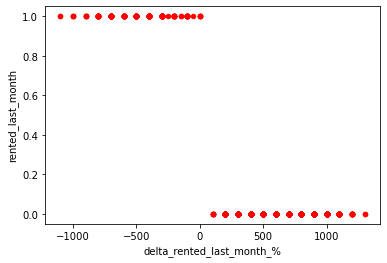

In [20]:
data.plot.scatter(x='delta_rented_last_month_%',y='rented_last_month',color='r')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data[['delta_rented_last_month_%']],data.rented_last_month,test_size=0.1)

In [41]:
model = LogisticRegression()

In [43]:
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
df1=data.head(predictions.shape[0])

In [56]:
predictions=model.predict(X_test)

In [79]:
model.score(X_test,y_test)

1.0